In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import torch.utils.data as data
import seaborn as sns
import matplotlib.pyplot as plt

from helper_functions import *
from data_functions import *
from models import *

if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

## Przetwarzanie danych

In [2]:
data = pd.read_csv('train_data.csv')
data = output_to_labels(data, "SalePrice")
categories = data.select_dtypes(include="object").columns
data = get_dummies(data, categories)
data = remove_corr_features(data, "SalePrice", 0.8)
data = equalize_classes(data, "SalePrice")
display(data.head())

,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesNearBy(Total),HallwayType_corridor,HallwayType_mixed,...,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,SalePrice
0,2006,814,3,111.0,184.0,3.0,0.0,6.0,False,False,...,False,False,False,False,False,True,False,False,False,1
1,1985,587,8,80.0,76.0,2.0,2.0,12.0,True,False,...,False,False,False,False,True,False,False,False,False,0
2,1985,587,6,80.0,76.0,2.0,2.0,12.0,True,False,...,False,False,False,False,True,False,False,False,False,0
3,2006,2056,8,249.0,536.0,5.0,11.0,3.0,False,False,...,False,False,False,False,False,False,False,True,False,2
4,1992,644,2,142.0,79.0,4.0,8.0,9.0,False,True,...,False,False,False,False,False,False,True,False,False,0


## Wczytanie finałowego modelu

In [3]:
data = data_to_dataset(data, "SalePrice")

In [4]:
net = NetFinal(data.tensors[0].shape[1], 100, 3)
state_dict = torch.load("final_model.tar")
net.load_state_dict(state_dict)

<All keys matched successfully>

## Ewaluacja

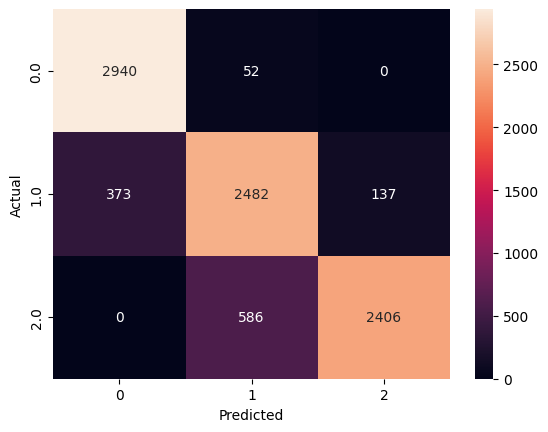

In [5]:
get_confusion_matrix_w(net, data)

In [6]:
get_balanced_accuracy(net, data)

0.8721033868092691